# Задача 3

In [1]:
%matplotlib inline
import numpy as np
import math as mt
import matplotlib
import matplotlib.pyplot as plt
from pylab import *
from scipy.stats import *

In [19]:
# Размер выборки
sz = 200
theta0 = 0

# Генерирую выборку размера sz из распределения Коши
x = cauchy.rvs(size=sz)

# Массив ОМП для модели N(theta,1), где ОМП - выборочное среднее
means = np.array([x[:(i+1)].mean() for i in range(sz)])

Для модели $N(\theta,1)$ априорное распределение - $N(\mu_0, \sigma^2_0)$ with mean$=\mu_0$, $\mu=\frac{\sum_{i=1}^n X_i + \frac{\mu_0}{\sigma^2_0}}{\frac{1}{\sigma^2_0} + n}$. 

Следовательно, ${\theta^*=\frac{\sum_{i=1}^n X_i + \frac{\mu_0}{\sigma^2_0}}{\frac{1}{\sigma^2_0} + n}}$.

In [20]:
def BayesEst(x, a, sigma):
    # Байесовская оценка для модели N(theta, 1)
    return (sum(x) + (a/sigma**2))/(len(x) + (1./(sigma**2)))

Известно, что с вероятностью не менее 0.95 выполнено неравенство $|\theta| \lt 0.5$.

Осталось подобрать параметры априорного распределения.

Воспользуемся правилом трёх сигм: на отрезке $[-2\sigma_0, 2\sigma_0]$ находятся 95% всех элементов из выборки $N(0,\sigma_0^2).$ 

Следовательно, так как $|\theta| \lt 0.5$ с вероятностью 0.95, то $2\sigma_0 \lt 0.5$ или $\sigma_0 \lt \frac{1}{4}.$

Поэтому параметры априорного распределения: $a=0, \: \sigma_0^2 = \frac{1}{16}.$

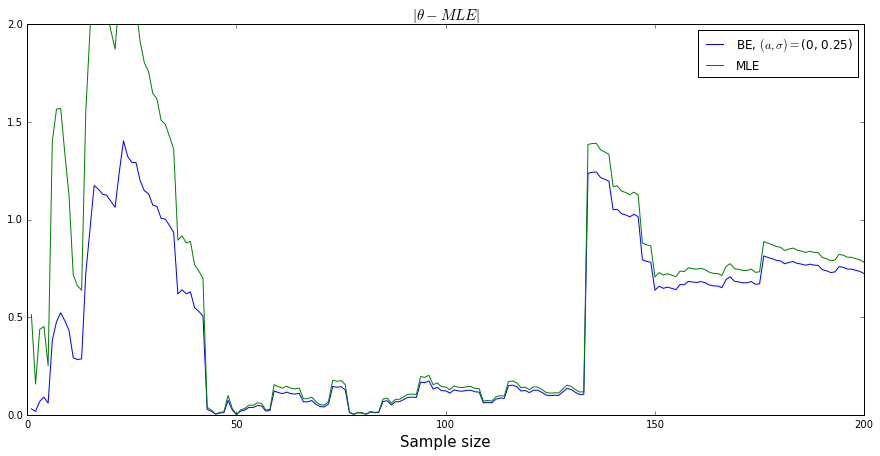

In [24]:
# Параметры для априорного распределения - среднее и корень из дисперсии.
param = (0, 1/4)

plt.figure(figsize=(15,7))

# Массив байесовских оценок
est = np.array([BayesEst(x[:(i+1)], param[0], param[1]) for i in range(sz)])

# BE stands for 'Bayes estimator'
# Строю график модуля разности истинного значения theta и
# байесовских оценок
plt.plot(np.arange(1,sz+1), abs(est - theta0), \
 label='BE, $(a, \sigma)=$({}, {})'.format(param[0], param[1]))

# Строю график модуля разности истинного значения theta и ОМП
plt.plot(np.arange(1,sz+1), abs(means-theta0), label='MLE')
plt.ylim((0,2))
plt.title('$|\\theta - MLE|$', fontsize=15)
plt.xlabel('Sample size', fontsize=15)
plt.legend()
    
plt.show()

Поскольку мы изначально брали выборку из распределения Коши, которое не имеет среднего, а потом рассматривали это как модель $N(\theta,1)$, то неудивительно, что полученные оценки очень плохие. Байесовская оценка на данном графике ведет себя лучше, чем ОМП, но это зависит от выборки.